In [2]:
import numpy as np
import math
import pandas as pd
from pandas import DataFrame
import os
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pylab



In /Users/zeliestalhanske/anaconda3/envs/climada_env/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/zeliestalhanske/anaconda3/envs/climada_env/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/zeliestalhanske/anaconda3/envs/climada_env/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /Users/zeliestalhanske/anaconda3/envs/climada_env/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.

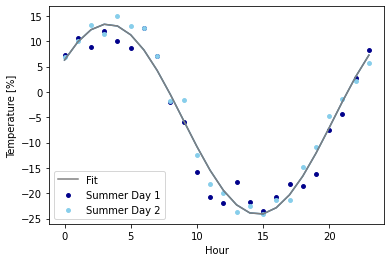

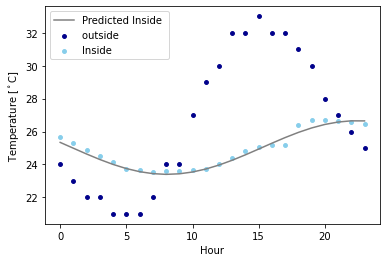

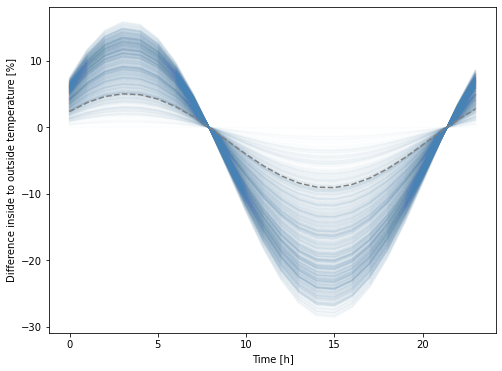

In [13]:
def T_diff_fit(x, a, b, c, phi):           # estimation of the function that could fit the data points
    return a * np.sin(b * x + phi) + c

Tin_Tout = pd.read_csv('../data/temperature_inside.csv') 

#data for first heat day
Tout = Tin_Tout['Tout1']
Tin = Tin_Tout['Tin1']
diff_T1 = (Tin-Tout)/Tout

#second heat day
Tout = Tin_Tout['Tout2']
Tin = Tin_Tout['Tin2']
diff_T2 = (Tin-Tout)/Tout

time = Tin_Tout['Time']


p0 = [10, 2*np.pi/24.0, -3.0, np.pi/4 ] # estimation of one point
Tin_est, pcov  = curve_fit(T_diff_fit, time, (diff_T1+diff_T2)/2, p0, method='dogbox') # get fit    
fit1=T_diff_fit(time,*Tin_est)


#plot of the points and the fitted sinus
fig,ax = plt.subplots(1,1)
ax.plot(time,fit1*100)
ax.scatter(time,diff_T1*100,label = 'Summer Day 1',s=15,color = 'darkblue')
ax.scatter(time,diff_T2*100, label = 'Summer Day 2',s=15,color='skyblue')
ax.set_xlabel('Hour')
ax.set_ylabel('Temperature [%]')
ax.plot(time,fit1*100,label='Fit',color='gray')
ax.legend()


Tin_est, pcov  = curve_fit(T_diff_fit, time, (Tout+fit1*Tout), p0, method='dogbox')    
fit2=T_diff_fit(time,*Tin_est)
fig,ax = plt.subplots(1,1)
ax.scatter(time,Tout,s=15,color = 'darkblue',label = 'outside ')
ax.scatter(time,Tin,label='Inside ',s=15,color='skyblue')
ax.plot(time,fit2,label='Predicted Inside ' ,color='gray') 
ax.set_xlabel('Hour')
ax.set_ylabel('Temperature [$^\circ$C]')
ax.legend()


fig,ax = plt.subplots(figsize=(8,6))
for i in range(1000):
    error = np.random.triangular(0,1,1.2)
    
    Tin_est, pcov  = curve_fit(T_diff_fit, time, (diff_T1+diff_T2)/2*error, p0, method='dogbox')    

    fit=T_diff_fit(time,*Tin_est)
    ax.plot(time, fit*100,color = 'steelblue',alpha = 0.02)
ax.plot(time,fit*100,color='gray',label='observed', linestyle='--')
ax.set_xlabel('Time [h]')
ax.set_ylabel('Difference inside to outside temperature [%]')
plt.savefig(''.join(['../figures/temperature_inside_outside.pdf']),bbox_inches='tight')   
     
